In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import json
import tensorflow_hub as hub


In [16]:
# Load the dataset and dataset info
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

# Split into train, validation, and test sets
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

# Extract dataset information
num_classes = dataset_info.features['label'].num_classes
num_train = dataset_info.splits['train'].num_examples
num_val = dataset_info.splits['validation'].num_examples
num_test = dataset_info.splits['test'].num_examples

# Display dataset information
print(f"Number of Classes: {num_classes}")
print(f"Training examples: {num_train}")
print(f"Validation examples: {num_val}")
print(f"Testing examples: {num_test}")


Number of Classes: 102
Training examples: 1020
Validation examples: 1020
Testing examples: 6149


In [17]:
for image, label in train_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")


Image shape: (500, 667, 3), Label: 72
Image shape: (500, 666, 3), Label: 84
Image shape: (670, 500, 3), Label: 70


2024-12-21 21:36:39.355074: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-12-21 21:36:39.362365: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


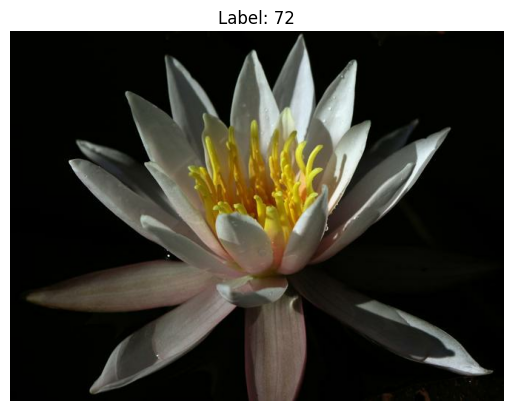

2024-12-21 21:36:39.482976: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
for image, label in train_dataset.take(1):
    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
    plt.show()


In [19]:
def preprocess_image(image, label):
    # Resize the image to (224, 224) and normalize pixel values to [0, 1]
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label


In [20]:
batch_size = 32

train_dataset = train_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)

print("Datasets are preprocessed and batched.")


Datasets are preprocessed and batched.


In [43]:
import tensorflow as tf
import tensorflow_hub as hub

# Define dummy input
dummy_input = tf.random.uniform((1, 224, 224, 3))

# Load the base model
base_model = hub.KerasLayer(
    'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',
    input_shape=(224, 224, 3),
    trainable=False
)

# Test the base model
try:
    output = base_model(dummy_input)
    print("Base model output shape:", output.shape)
except Exception as e:
    print("Error with base model:", e)


Base model output shape: (1, 1280)


In [48]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model, layers

# Load MobileNetV2 base model
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # Exclude the classification head
    weights='imagenet'
)
base_model.trainable = False

# Define input layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Pass inputs through the MobileNetV2 base
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(102, activation='softmax')(x)

# Create and compile the model
model = Model(inputs, outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model built successfully with MobileNetV2.")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Model built successfully with MobileNetV2.


In [49]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("Model compiled successfully.")


Model compiled successfully.


In [50]:
history = model.fit(
    train_dataset,           # Your training dataset
    validation_data=val_dataset,  # Your validation dataset
    epochs=10                # Adjust the number of epochs as needed
)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 346ms/step - accuracy: 0.0653 - loss: 4.6262 - val_accuracy: 0.4863 - val_loss: 2.9122
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.6301 - loss: 2.0463 - val_accuracy: 0.6059 - val_loss: 1.7338
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.7952 - loss: 0.9312 - val_accuracy: 0.6941 - val_loss: 1.2753
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.9108 - loss: 0.5214 - val_accuracy: 0.7304 - val_loss: 1.1077
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.9539 - loss: 0.3132 - val_accuracy: 0.7490 - val_loss: 0.9586
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.9803 - loss: 0.1835 - val_accuracy: 0.7775 - val_loss: 0.8723
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.9937 - loss: 0.1128 - val_accuracy: 0.7843 - val_loss: 0.8173
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 341ms/step - accuracy: 0.9970 - loss: 0.0817 - val_accu

In [51]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 171ms/step - accuracy: 0.7599 - loss: 0.9312
Test Accuracy: 0.76


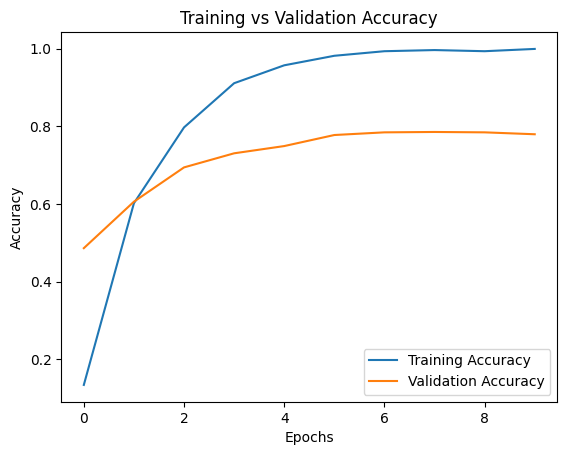

In [52]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [53]:


model.save('flower_classifier_mobilenetv2.h5')
print("Model saved successfully.")


Model saved successfully.


In [54]:
def preprocess_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [60]:
import json

# Load the label map
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Verify the loaded class names
print("Loaded class names:", class_names)


Loaded class names: {'0': 'pink primrose', '1': 'hard-leaved pocket orchid', '2': 'canterbury bells', '3': 'sweet pea', '4': 'english marigold', '5': 'tiger lily', '6': 'moon orchid', '7': 'bird of paradise', '8': 'monkshood', '9': 'globe thistle', '10': 'snapdragon', '11': "colt's foot", '12': 'king protea', '13': 'spear thistle', '14': 'yellow iris', '15': 'globe-flower', '16': 'purple coneflower', '17': 'peruvian lily', '18': 'balloon flower', '19': 'giant white arum lily', '20': 'fire lily', '21': 'pincushion flower', '22': 'fritillary', '23': 'red ginger', '24': 'grape hyacinth', '25': 'corn poppy', '26': 'prince of wales feathers', '27': 'stemless gentian', '28': 'artichoke', '29': 'sweet william', '30': 'carnation', '31': 'garden phlox', '32': 'love in the mist', '33': 'mexican aster', '34': 'alpine sea holly', '35': 'ruby-lipped cattleya', '36': 'cape flower', '37': 'great masterwort', '38': 'siam tulip', '39': 'lenten rose', '40': 'barbeton daisy', '41': 'daffodil', '42': 'swo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Predicted class name: garden phlox


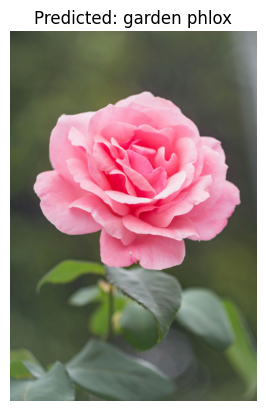


Top 5 Predictions:
garden phlox: 0.49
snapdragon: 0.18
rose: 0.11
camellia: 0.10
foxglove: 0.02


In [61]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt

# Define the preprocess_image function
def preprocess_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to the downloaded image
image_path = "/Users/Teamaa/Desktop/flower.jpg"  # Replace with the actual path if it's in a different directory

# Preprocess the image
processed_image = preprocess_image(image_path)

# Load the saved model
model = tf.keras.models.load_model(
    'flower_classifier_mobilenetv2.h5',  # Replace with your model file
    custom_objects={'KerasLayer': tf.keras.layers.Layer}  # Custom object handling for TensorFlow Hub layers, if needed
)

# Make predictions
predictions = model.predict(processed_image)

# Get the predicted class index
predicted_class = tf.argmax(predictions[0]).numpy()

# Load the label map
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Map the predicted class index to the class name
predicted_class_name = class_names[str(predicted_class)]

# Display the predicted class
print(f"Predicted class name: {predicted_class_name}")

# Show the image with the predicted class
plt.imshow(tf.keras.utils.load_img(image_path))
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

# Optional: Display the top 5 predictions with probabilities
top_k = 5
top_k_indices = tf.argsort(predictions[0], direction='DESCENDING')[:top_k]

print("\nTop 5 Predictions:")
for i in top_k_indices:
    class_index = i.numpy()
    class_name = class_names[str(class_index)]
    probability = predictions[0][class_index]
    print(f"{class_name}: {probability:.2f}")


In [62]:
# Load the trained model
model = tf.keras.models.load_model('flower_classifier_mobilenetv2.h5')


In [63]:
# Load the trained model
model = tf.keras.models.load_model('flower_classifier_mobilenetv2.h5')


In [64]:
# Predict the class probabilities
predictions = model.predict(processed_image)

# Get the predicted class index
predicted_class = tf.argmax(predictions[0]).numpy()
print(f"Predicted class index: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Predicted class index: 31


In [65]:
# Get the predicted class name
predicted_class_name = class_names[str(predicted_class)]
print(f"Predicted class: {predicted_class_name}")


Predicted class: garden phlox


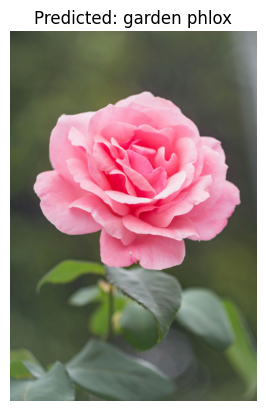

In [66]:
import matplotlib.pyplot as plt

# Show the image and prediction
plt.imshow(tf.keras.utils.load_img(image_path))
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()


In [67]:
# Get the top K predictions
top_k = 5
top_k_indices = tf.argsort(predictions[0], direction='DESCENDING')[:top_k]

# Print the top K predictions
print("\nTop 5 Predictions:")
for i in top_k_indices:
    class_index = i.numpy()
    class_name = class_names[str(class_index)]
    probability = predictions[0][class_index]
    print(f"{class_name}: {probability:.2f}")



Top 5 Predictions:
garden phlox: 0.49
snapdragon: 0.18
rose: 0.11
camellia: 0.10
foxglove: 0.02


In [2]:
import tensorflow as tf

# Load the previously saved model
model = tf.keras.models.load_model('flower_classifier_mobilenetv2.h5')


In [35]:
for images, labels in train_dataset.take(1):
    print("Batch shape from dataset:", images.shape)
    print("Pixel range:", tf.reduce_min(images).numpy(), tf.reduce_max(images).numpy())


Batch shape from dataset: (32, 224, 224, 3)
Pixel range: 0.0 1.0


In [4]:
print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,966,184 (11.32 MB)

 Trainable params: 708,198 (2.70 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

None


In [7]:
# Save the model in TensorFlow SavedModel format
model.save('flower_classifier_mobilenetv2.keras')


In [39]:
base_model = hub.KerasLayer(
    'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',
    trainable=False,
    arguments={'batch_input_shape': (None, 224, 224, 3)}
)


In [40]:
from tensorflow.keras import layers

# Preprocess the inputs
normalized_inputs = layers.Rescaling(1./255)(inputs)  # Normalizes the pixel values to [0, 1]
